
# Project 2
 ## ECE3311 "Principles of Communication Systems" (B-Term 2020)
 ## Python Scripts

In [2]:
# importing comms libraries
import numpy as np
import scipy as spy
import scipy.interpolate
import matplotlib.pyplot as plt
import math

In [3]:
# Define plotting parameters
pxoffset = 1
pyoffset = 1
pwidth = 4
pheight = 3
txtsize = 9

# Define parameters
L = 100  # Length of the overall transmission
N = 10   # Pulse duration for rectangular pulse train
M = 10   # Upsampling factor for generating analog waveform
L_lc = 20 # Line coding pulse duration

In [4]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

In [5]:
# Matlab's quantiz function
def quantize(signal, partitions, codebook):
    indices = []
    quanta = []
    for datum in signal:
        index = 0
        while index < len(partitions) and datum > partitions[index]:
            index += 1
        indices.append(index)
        quanta.append(codebook[index])
    return indices, quanta

# Section 1: Basic Python Scripts

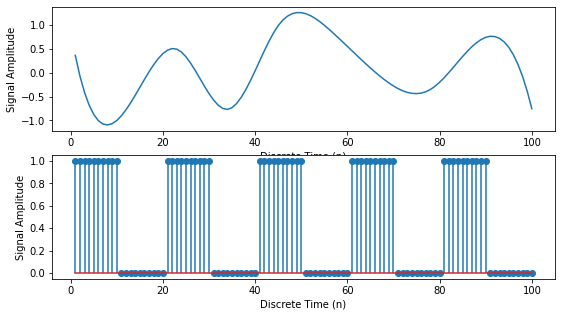

In [6]:
'''
 Generate a discrete version of a random continuous analog
 waveform using a Uniform Random Number Generator and
 an interpolation function to smooth out the result
'''
analog_wavefm = interpolate_1d_vector((2*np.random.random(((int)(L/M),))-1),M) 
# Generate a rectangular pulse train of samples
impulsetrain_wavefm = np.reshape(np.ones((N,1))*np.remainder(np.arange(1,((L/N)+1)),2),(1,L), order='F')

# Visualize

plt.figure(figsize=(9, 5))

plt.subplot(211)
plt.plot(np.arange(1,L+1),analog_wavefm)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),impulsetrain_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Section 2: Generate PAM Waveforms

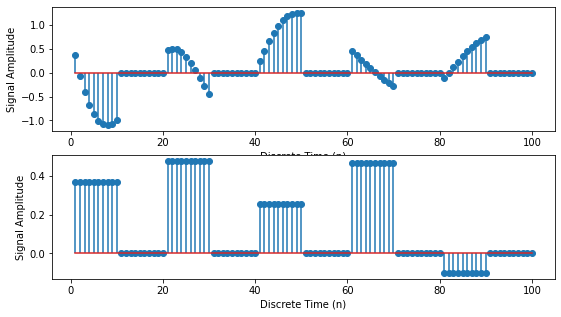

In [7]:
# Natural Sampling PAM
nspam_wavefm = np.multiply(impulsetrain_wavefm, analog_wavefm).T#impulsetrain_wavefm.*analog_wavefm;

# Flat-Top PAM

#downsampling
temp1 = analog_wavefm[0::2*N]


# upsampling 
temp2 = (int)(N/2)
temp3 = N
temp = np.zeros((temp3,))
temp[::2] = temp1



ftpam_wavefm = np.reshape(np.ones((N,1))*temp,(1,L), order='F');


# Visualize

plt.figure(figsize=(9, 5))

plt.subplot(211)
plt.stem(np.arange(1,L+1),nspam_wavefm)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),ftpam_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Section 3: Generate PCM Waveforms

10


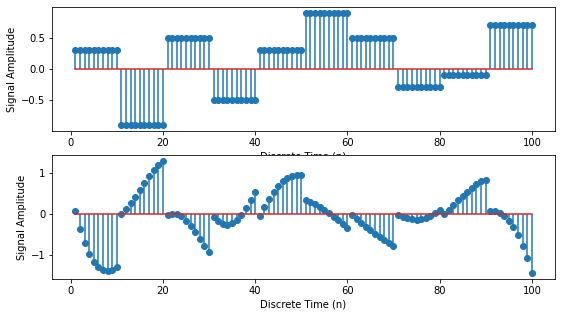

In [8]:
# Create PCM waveform and its corresponding error waveform
[ind,quantv] = quantize(analog_wavefm[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
pcm_wavefm = np.reshape(np.ones((N,1))*quantv,[1,L], order='F')
pcm_err_wavefm = analog_wavefm - pcm_wavefm


# Visualize
plt.figure(figsize=(9, 5))

plt.subplot(211)
plt.stem(np.arange(1,L+1),pcm_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),pcm_err_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


# Section 4: Line Coding

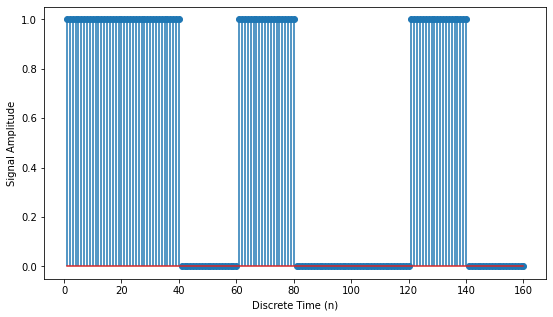

In [9]:


# Generate your own line codes for the binary string `11001100'
bin_str = [1,1,0,1,0,0,1,0]
upnrz1 = np.ones((1,L_lc))
upnrz0 = np.zeros((1,L_lc))
upnrz_wavefm = list()
bpflag = 0;

for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        upnrz_wavefm.append(upnrz1.flatten())
    else:
        upnrz_wavefm.append(upnrz0.flatten());



# Visualize
plt.figure(figsize=(9, 5))

plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(upnrz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude');
plt.show()


# Section 5: Eye Diagrams

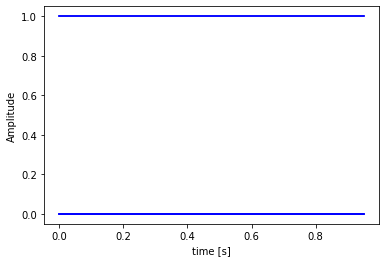

In [10]:
# Generate unipolar waveform
rand_bin_str = np.around(np.random.random((1,L))).flatten()
new_upnrz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1):
        new_upnrz_wavefm.append(upnrz1.flatten())
    else:
        new_upnrz_wavefm.append(upnrz0.flatten())

# Visualize
# Unipolar-waveform
sig = np.array(new_upnrz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)
# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()

## END OF PROJECT 2 CODE 